In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


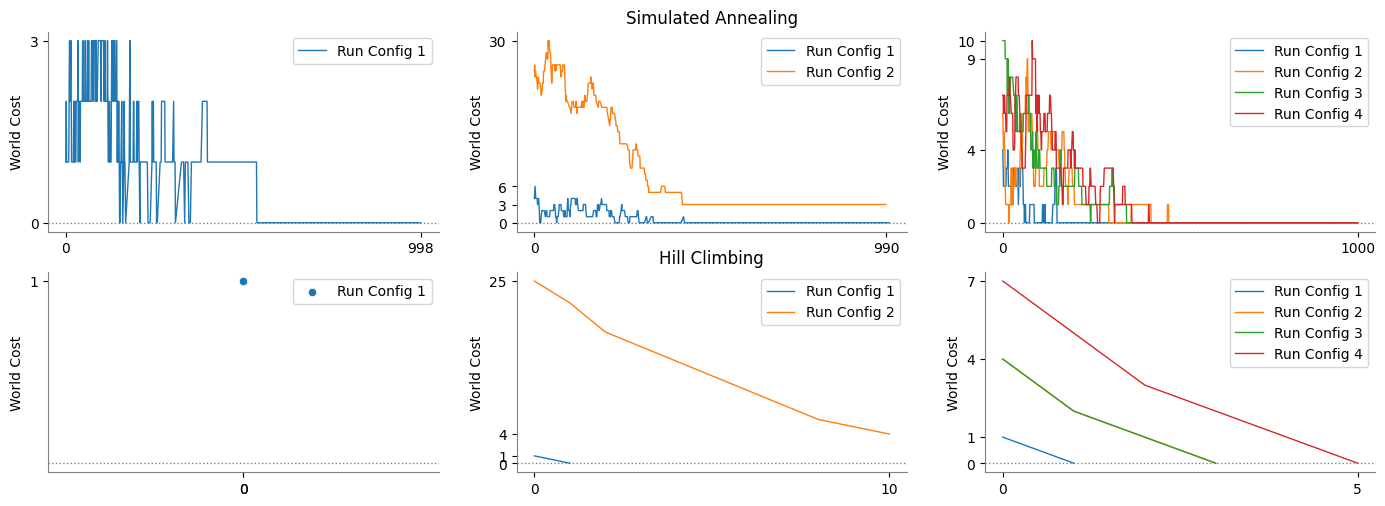

In [4]:
df_map = {
    "Problem 1": {
        "SA": {
            "Run Config 1": "p1_sa_rc-1_srand-0.csv",
        },
        "HC": {
            "Run Config 1": "p1_hc_rc-1_srand-0.csv",
        }
    },

    "Problem 2": {
        "SA": {
            "Run Config 1": "p2_sa_rc-1_srand-0.csv",
            "Run Config 2": "p2_sa_rc-2_srand-0.csv",
        },
        "HC": {
            "Run Config 1": "p2_hc_rc-1_srand-0.csv",
            "Run Config 2": "p2_hc_rc-2_srand-0.csv",
        },
    },

    "Problem 3": {
        "sa": {
            "Run Config 1": "p3_sa_rc-1_srand-0.csv",
            "Run Config 2": "p3_sa_rc-2_srand-0.csv",
            "Run Config 3": "p3_sa_rc-3_srand-0.csv",
            "Run Config 4": "p3_sa_rc-4_srand-0.csv",
        },
        "hc": {
            "Run Config 1": "p3_hc_rc-1_srand-0.csv",
            "Run Config 2": "p3_hc_rc-2_srand-0.csv",
            "Run Config 3": "p3_hc_rc-3_srand-0.csv",
            "Run Config 4": "p3_hc_rc-4_srand-0.csv",
        },
    }
}

# Setup all figure and axes
colors = sns.color_palette("tab10")
fig, axes = plt.subplots(2, 3, figsize=(14, 5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
axes[0, 1].set_title("Simulated Annealing")
axes[1, 1].set_title("Hill Climbing")

# Draw all problems to algorithm
for i, p in enumerate(df_map.keys()):
    for j, alg in enumerate(df_map[p].keys()):
        ax = axes[j, i]

        # Draw grey line at 0
        ax.axhline(0, color="grey", linewidth=1, linestyle="dotted")

        # Draw all run configurations to problem / algorithm
        dfs = []
        for k, rc in enumerate(df_map[p][alg].keys()):
            df = pd.read_csv(df_map[p][alg][rc])
            df["Fitness"] *= -1

            # Draw point if only row
            if len(df) == 1:
                sns.scatterplot(data=df, x="Iteration", y="Fitness", ax=ax, color=colors[k % len(colors)], label=rc)
                
            # Draw line otherwise
            else:
                color = colors[k % len(colors)]
                sns.lineplot(data=df, x="Iteration", y="Fitness", ax=ax, color=color, linewidth=1, label=rc)
            
            dfs.append(df)

        # Remove ticks from ax
        ax.set_xticks([0, max(df["Iteration"])])
        ax.set_xlabel("")
        ax.set_ylabel("World Cost")

        # Set yticks to include min and max of each dfs
        yticks = set()
        for df in dfs:
            yticks.add(df["Fitness"].min())
            yticks.add(df["Fitness"].max())
        ax.set_yticks(list(yticks))

        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('gray')
        ax.spines['bottom'].set_color('gray')

plt.show()


Problem 1 SA Run Config 1 Max Fitness: 4 Max Found: 3.11538
Problem 1 HC Run Config 1 Max Fitness: 0 Max Found: -1
Problem 2 SA Run Config 1 Max Fitness: 12 Max Found: 10.735
Problem 2 SA Run Config 2 Max Fitness: 0 Max Found: -3
Problem 2 HC Run Config 1 Max Fitness: 12 Max Found: 8.98366
Problem 2 HC Run Config 2 Max Fitness: 0 Max Found: -4
Problem 3 SA Run Config 1 Max Fitness: 10 Max Found: 8.16929
Problem 3 HC Run Config 1 Max Fitness: 10 Max Found: 7.808


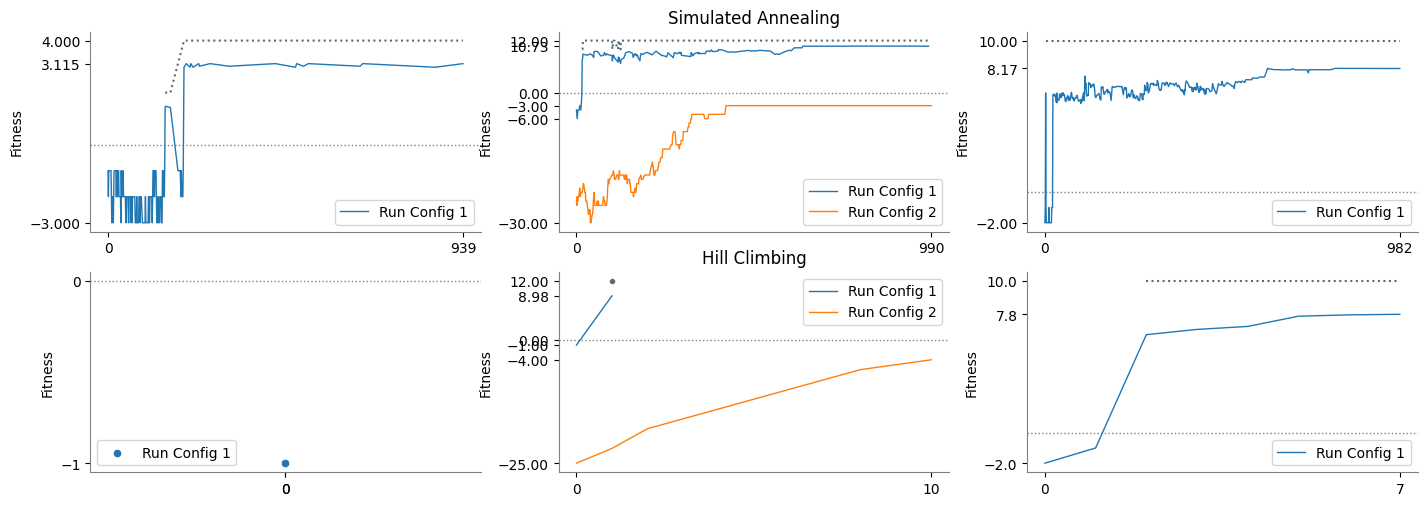

In [6]:
df_map = {
    "Problem 1": {
        "SA": {
            "Run Config 1": "p1_full_sa_rc-1_srand-0.csv",
        },
        "HC": {
            "Run Config 1": "p1_full_hc_rc-1_srand-0.csv",
        }
    },

    "Problem 2": {
        "SA": {
            "Run Config 1": "p2_full_sa_rc-1_srand-0.csv",
            "Run Config 2": "p2_full_sa_rc-2_srand-0.csv",
        },
        "HC": {
            "Run Config 1": "p2_full_hc_rc-1_srand-0.csv",
            "Run Config 2": "p2_full_hc_rc-2_srand-0.csv",
        },
    },

    "Problem 3": {
        "SA": {
            "Run Config 1": "p3_full_sa_rc-1_srand-0.csv",
            "Run Config 2": "p3_full_sa_rc-2_srand-0.csv",
            "Run Config 3": "p3_full_sa_rc-3_srand-0.csv",
            "Run Config 4": "p3_full_sa_rc-4_srand-0.csv",
        },
        "HC": {
            "Run Config 1": "p3_full_hc_rc-1_srand-0.csv",
            "Run Config 2": "p3_full_hc_rc-2_srand-0.csv",
            "Run Config 3": "p3_full_hc_rc-3_srand-0.csv",
            "Run Config 4": "p3_full_hc_rc-4_srand-0.csv",
        },
    }
}

# Setup all figure and axes
colors = sns.color_palette("tab10")
light_colors = sns.color_palette("tab10", desat=0.2)
fig, axes = plt.subplots(2, 3, figsize=(14, 5))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)
axes[0, 1].set_title("Simulated Annealing")
axes[1, 1].set_title("Hill Climbing")

# Draw all problems to algorithm
for i, p in enumerate(df_map.keys()):
    for j, alg in enumerate(df_map[p].keys()):
        ax = axes[j, i]

        # Draw grey line at 0
        ax.axhline(0, color="grey", linewidth=1, linestyle="dotted")

        # Draw all run configurations to problem / algorithm
        dfs = []
        for k, rc in enumerate(df_map[p][alg].keys()):
            try:
                df = pd.read_csv(df_map[p][alg][rc])
            except:
                continue

            # Print out maximum found and max possible fitness
            print(f"{p} {alg} {rc} Max Fitness: {df['Paths'].max() * 2} Max Found: {df['Fitness'].max()}")

            df["MaxFitness"] = df["Paths"] * 2
            df_mf = df[df["Paths"] > 0]

            if len(df) == 1:
                sns.scatterplot(data=df, x="Iteration", y="Fitness", ax=ax, color=colors[k % len(colors)], label=rc)
            else:
                sns.lineplot(data=df, x="Iteration", y="Fitness", ax=ax, color=colors[k % len(colors)], linewidth=1, label=rc)

            if len(df_mf) == 1:
                sns.scatterplot(data=df_mf, x="Iteration", y="MaxFitness", ax=ax, color=light_colors[k % len(light_colors)], size=0.5, legend=False)
            else:
                sns.lineplot(data=df[df["Paths"] > 0], x="Iteration", y="MaxFitness", ax=ax, linestyle="dotted", color=light_colors[k % len(light_colors)])
            
            # sns.lineplot(data=df, x="Iteration", y="Paths", ax=ax, color=color, linewidth=1, label=rc)
            dfs.append(df)

        # Remove ticks from ax
        ax.set_xticks([0, max(df["Iteration"])])
        ax.set_xlabel("")
        ax.set_ylabel("Fitness")

        # Set yticks to include min and max of each dfs
        yticks = set()
        for df in dfs:
            yticks.add(df["Fitness"].min())
            yticks.add(df["Fitness"].max())
            yticks.add(df["MaxFitness"].max())
        ax.set_yticks(list(yticks))

        ax.spines['top'].set_color('none')
        ax.spines['right'].set_color('none')
        ax.spines['left'].set_color('gray')
        ax.spines['bottom'].set_color('gray')

plt.show()


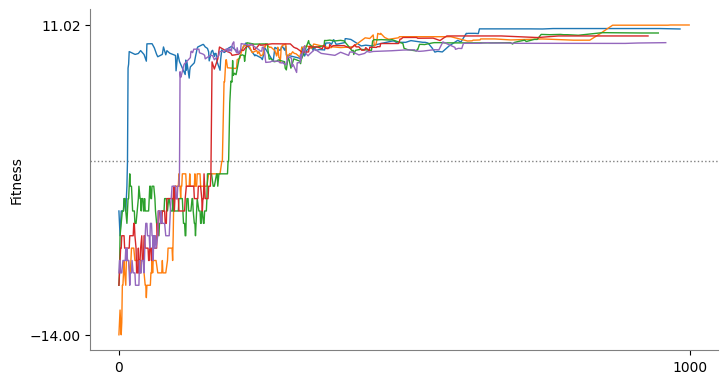

In [20]:
df_names = [
    "p2_full_sa_rc-1_srand-0.csv",
    "p2_full_sa_rc-1_srand-1.csv",
    "p2_full_sa_rc-1_srand-2.csv",
    "p2_full_sa_rc-1_srand-3.csv",
    "p2_full_sa_rc-1_srand-4.csv"
]

# Setup all figure and axes
colors = sns.color_palette("tab10")
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Draw grey line at 0
ax.axhline(0, color="grey", linewidth=1, linestyle="dotted")

# Draw all run configurations to problem / algorithm
dfs = []
for i in range(len(df_names)):
    df = pd.read_csv(df_names[i])
    sns.lineplot(data=df, x="Iteration", y="Fitness", ax=ax, color=colors[i % len(colors)], linewidth=1)
    dfs.append(df)

# Remove ticks from ax
ax.set_xticks([0, 1000])
ax.set_xlabel("")
ax.set_ylabel("Fitness")

# Set yticks to include min and max of each dfs
yticks = []
yticks.append(min([ df["Fitness"].min() for df in dfs ]))
yticks.append(max([ df["Fitness"].max() for df in dfs ]))
ax.set_yticks(yticks)

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_color('gray')
ax.spines['bottom'].set_color('gray')

plt.show()


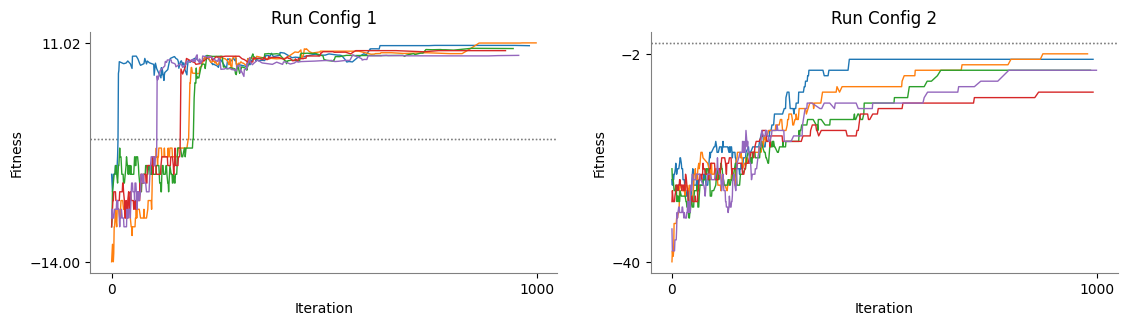

In [29]:
df_names_rc1 = [
    "p2_full_sa_rc-1_srand-0.csv",
    "p2_full_sa_rc-1_srand-1.csv",
    "p2_full_sa_rc-1_srand-2.csv",
    "p2_full_sa_rc-1_srand-3.csv",
    "p2_full_sa_rc-1_srand-4.csv"
]
df_names_rc2 = [
    "p2_full_sa_rc-2_srand-0.csv",
    "p2_full_sa_rc-2_srand-1.csv",
    "p2_full_sa_rc-2_srand-2.csv",
    "p2_full_sa_rc-2_srand-3.csv",
    "p2_full_sa_rc-2_srand-4.csv"
]


# Setup all figure and axes
colors = sns.color_palette("tab10")
fig, axes = plt.subplots(1, 2, figsize=(11, 3))
fig.tight_layout()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

# Setup axes
for ax in axes:
    ax.axhline(0, color="grey", linewidth=1, linestyle="dotted")
    ax.axhline(0, color="grey", linewidth=1, linestyle="dotted")
    ax.spines['top'].set_color('none')
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('gray')
    ax.spines['bottom'].set_color('gray')
    ax.set_xticks([0, 1000])
    ax.set_xlabel("")
    ax.set_ylabel("Fitness")
axes[0].set_title("Run Config 1")
axes[1].set_title("Run Config 2")

dfs_rc1 = []
for i in range(len(df_names_rc1)):
    df = pd.read_csv(df_names_rc1[i])
    sns.lineplot(data=df, x="Iteration", y="Fitness", ax=axes[0], color=colors[i % len(colors)], linewidth=1)
    dfs_rc1.append(df)

yticks = []
yticks.append(min([ df["Fitness"].min() for df in dfs_rc1 ]))
yticks.append(max([ df["Fitness"].max() for df in dfs_rc1 ]))
axes[0].set_yticks(yticks)

dfs_rc2 = []
for i in range(len(df_names_rc2)):
    df = pd.read_csv(df_names_rc2[i])
    sns.lineplot(data=df, x="Iteration", y="Fitness", ax=axes[1], color=colors[i % len(colors)], linewidth=1)
    dfs_rc2.append(df)

yticks = []
yticks.append(min([ df["Fitness"].min() for df in dfs_rc2 ]))
yticks.append(max([ df["Fitness"].max() for df in dfs_rc2 ]))
axes[1].set_yticks(yticks)

plt.show()
